## Assignment 4: k-means algorithm

- Please write your own code for the k-means algorithm without using a direct function. 

- You can utilize basic functions. 

- You should submit one run-code file and one readme file by soft and hody copy respectively. 

-Due date: June 12th, 2018 until 12:30 pm (noon)

20141702 SeungHeon Doh

In [121]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Gaussian Mixture model

$$
P_X(x) =\sum_{k=1}^{K}\pi_k N(x\space|\space\mu_i, \Sigma_i)
$$

- Multinomial distribution (How many K?)
    - $\pi$ : mixing coefficient
- Multivariable Gaussian Distribution (In K, how about distribution)
    - $N(x\space|\space\mu_i, \Sigma_i)$ : Gaussian Distribution (about sub population)

### 2. K-means

- K-means is special case in GMM
- Objective function
$$
J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)
$$

    - $x_n$: n번째 데이터 포인트 위치
    - $\mu_k$: k번째 중심의 위치를 나타내는 결정 변수
    - $r_{nk}$: n번째 데이터 포인트가 k번째 군집에 속하면 1, 그렇지 않으면 0인 이진 결정 변수

    > $J$의 최적 값을 구하는 과정에서 $r_{nk}$가 이진 결정 변수이므로 J를 $r_{nk}$에 대해 미분하는 것은 불가능합니다.<br/> 
    > 따라서 중심의 위치 $\mu_k$와 데이터의 할당 정보 $r_{nk}$를 상호적으로(Interacting) 변화시키면서 $J$의 값을 반복적으로 줄여나가는 반복 최적화(Iterative Optimization) 알고리즘으로 $\mu_k$값을 구할 수 있습니다.<br/> 
    > 이렇게 구한 $\mu_k$는 다음과 같이 나타납니다.
    
$$
\mu_k=\frac{\sum_{n=1}^{N} x_n r_{nk}}{\sum_{n=1}^{N} r_{nk}}
$$

- Distance measure
$$
d(x_i, \mu_k) = || x_i - \mu_k ||^2
$$

- Iteration
    1. 임의의 중심값  μk  를 고른다. (보통 데이터 샘플 중의 하나를 선택)
    2. 중심에서 각 샘플 데이터까지의 거리를 계산
    3. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
    4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.

In [122]:
# pi_true: pi_true의 instance는 각 random variable의 혼합계수
# mu_true, sigma_true: Multivariate normal distribution의 mean matrix, covariance matrix

pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([[-1, 3], [1, 5], [3,7]])
sigma_true = np.zeros((3, 2, 2))
sigma_true[0] = np.array([[0.9, 0.1], [0.1, 0.9]])/3
sigma_true[1] = np.array([[0.6, 0.4], [0.4, 0.6]])/3
sigma_true[2] = np.array([[0.7, 0.3], [0.3, 0.7]])/3
col = ['red', 'green', 'blue', 'black', 'yellow']

In [123]:
# N: 생성할 random variable의 총 개수
# v[i, j, k]: j번째로 생성된 i번째 random variable(R_i)의 X(k=0) 및 Y(k=1)값
# C[i]: 생성된 i번째 random variable(R_i)의 개수

N = 100
v = np.zeros((len(pi_true), N, 2))
C = np.zeros(len(pi_true), dtype = 'int64')
obs = np.zeros((N, 2))

__ Distance Measure__

In [124]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

__k and iteration Setting__

In [125]:
k = 5 # 군집의 개수
itrEM = 100 # iteration 횟수
showVisualization = [2, 3, 4, 5, 6, 10, 20] # 군집화된 결과를 가시화 할 iteration 횟수

__Data Generalization__

In [126]:
for i in range(N):
    z = np.random.random()
    idx = 0
    needle = 0
    
    for j in range(len(pi_true)): # 생성할 random variable의 혼합계수에 비례하게 변수를 생성
        if z >= needle and z <= needle + pi_true[j]:
            idx = j
            break
        else:
            needle += pi_true[j]
    # 위의 for-statement에서 결정된 idx 값에 따라(혼합계수에 따라) random variable을 생성함
    obs[i] = np.random.multivariate_normal(mu_true[idx], sigma_true[idx]) 
    C[idx] += 1 # R_i가 몇개 생성되었는지 기록
    v[idx, C[idx]] = obs[i] # multivariate normal distribution을 따르는 값을 random variable의 i값 및 빈도별로 저장함

In [127]:
print(obs[1:10])

[[-0.32991851  1.73678603]
 [ 1.10772254  5.36342951]
 [ 1.14320059  4.90107725]
 [-1.73654009  3.05563313]
 [ 1.42762712  5.41085794]
 [-1.60887342  3.66371277]
 [ 0.90762746  5.03633058]
 [-0.9642686   2.86170088]
 [-2.11656068  2.6395526 ]]


In [128]:
# iteration 에 따른 k-th cluster의 무계중심 (X,Y - 2차원)
centroid = np.zeros((itrEM, k, 2))
# objective function : Data point 와 centroid의 distance를 다 sumation 한 값
sumDistance = np.zeros(itrEM-1) 
# assignment : Nth data point가 속하는 군집 값
assignment = np.zeros(N, dtype = 'int64')

In [129]:
# Assign K data point is centroids
for i in range(k):
    centroid[0, i, :]  = obs[i,:]

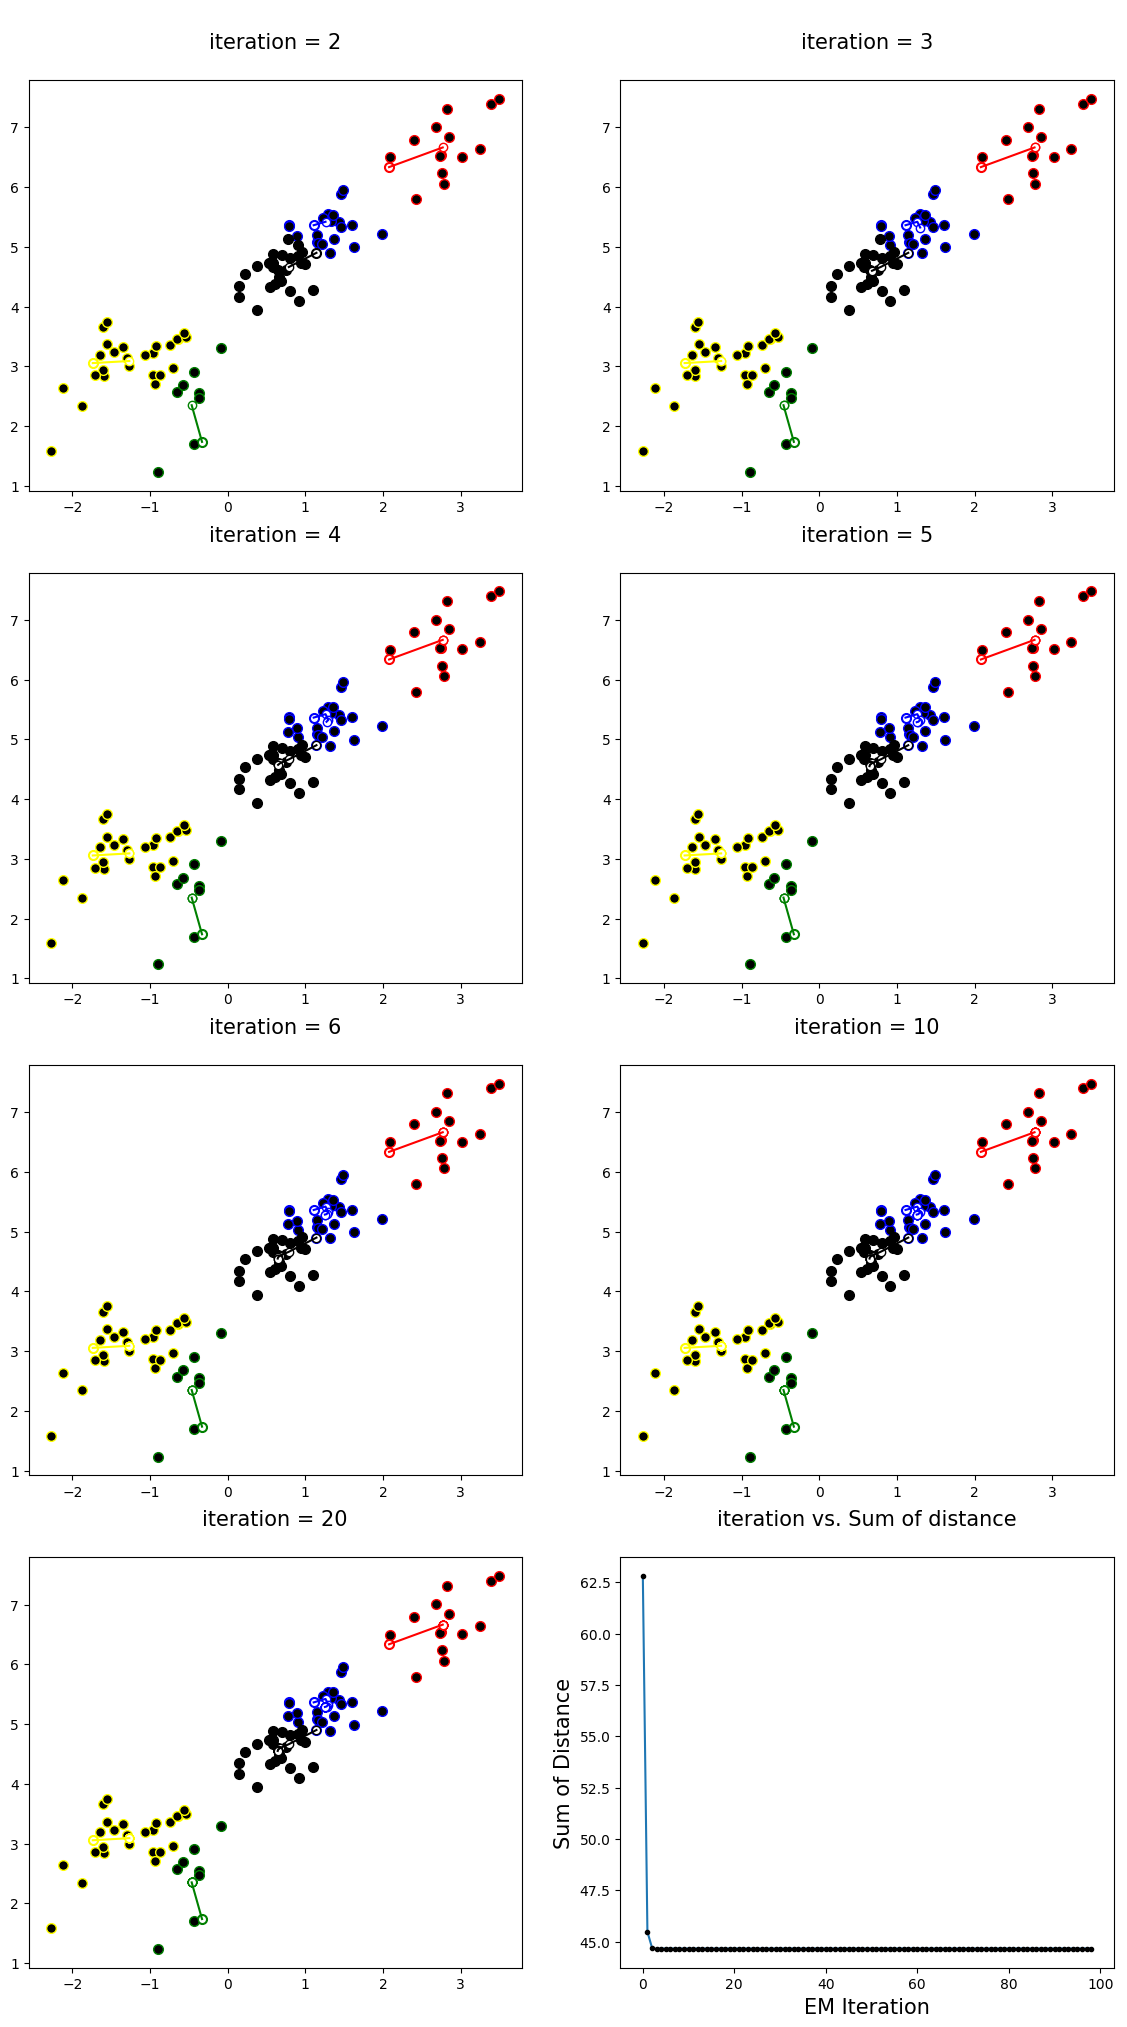

In [130]:
plt.figure(1, figsize=(14, 25), dpi=100)
plotN = 1
for i in range(1, itrEM):       
    for j in range(N): # 생성한 모든 random variable에 대하여 군집화를 실시
        idxK = 0
        # 첫번째 군집의 무게중심에 대한 데이터 포인트의 거리를 minDist의 초기값으로 설정
        minDist = distance(centroid[i-1, 0, :], obs[j, :]) 
        
        #각 데이터 포인트를 가장 가까운 군집에 할당하는 과정 - EM알고리즘에서 E과정
        for l in range(1, k):
            dist = distance(centroid[i-1, l, :], obs[j, :]) # 각각의 무게중심에 대한 데이터 포인트의 거리 계산
            
            if minDist > dist: # 첫번째 군집보다 가까운 군집이 존재할 때, 데이터 포인트가 속하는 군집을 변경해 줌
                minDist = dist
                idxK = l
        assignment[j] = idxK
        sumDistance[i-1] += distance(centroid[i-1, idxK, :], obs[j, :]) # 목표함수 계산
    
    cntGroups = np.zeros(k) + 1e-5 # 해당 군집에 속하는 데이터 포인트가 0인 경우를 대비하여 1e-5를 더해줌
    
    for j in range(N):        
        cntGroups[assignment[j]] += 1 # 각 군집에 속하는 데이터 포인트 계산
        centroid[i, assignment[j]] += obs[j] # 각 군집에 속하는 데이터 포인트의 좌표값을 더해줌
    
    for j in range(k):
        centroid[i, j] /= cntGroups[j] # 각 군집의 무게중심 값 계산 - EM알고리즘에서 M과정
    
    if i in showVisualization: # 가시화 할 iterEM일 경우 아래의 과정을 수행함
        plt.subplot(4, 2, plotN)
        plt.title(' \niteration = %s\n'%(i), fontsize = 15)
        plotN += 1
        
        for j in range(k):
                  
            points = np.zeros((int(cntGroups[j]), 2))
            cntTemp = 0
            
            # 해당 데이터포인트가 j 군집에 속할 경우 points에 좌표를 저장함
            for l in range(N):
                if assignment[l] == j: 
                    points[cntTemp] = obs[l]
                    cntTemp += 1
            
            # j 군집에 속하는 point를 검정색 점으로 나타내고, 테두리는 col[j]로 나타냄
            #검정
            plt.plot(points[:, 0], points[:, 1], 'ko', markeredgecolor = col[j], markersize = 7, markeredgewidth = 1) 
            # 초기 군집의 무게중심과 itrEM 후의 무게중심을 흰 점으로 나타내고 테두리는 col[j]로 나타냄
            plt.plot(centroid[0:i, j, 0], centroid[0:i, j, 1], 'wo', markeredgecolor = col[j])
            plt.plot(centroid[0:i, j, 0], centroid[0:i, j, 1], color = col[j])

# iteration에 따른 목표함수 값의 변화를 나타냄
plt.subplot(4, 2, 8)
plt.title('iteration vs. Sum of distance\n', fontsize=15)
plt.xlabel('EM Iteration', fontsize = 15)
plt.ylabel('Sum of Distance', fontsize = 15)
plt.plot(sumDistance[:])
plt.plot(sumDistance[:], 'ko', markersize = 3)

plt.show()

We can find local minimum in K-means!